# Detecting Fake News

There is so many fake news going around , in this notebook I'll be solving a dataset using **tfidfvectorizer, PassiveAggressive Classifier.** 

### A) What is Fake News?
A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.

### B) What is a TfidfVectorizer?

#### TF:
(Term Frequency): The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

#### IDF 
(Inverse Document Frequency): Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

### C) What is a PassiveAggressiveClassifier?
Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

### The Dataset
The dataset we will use for this python project- we will call it news.csv.The first column identifies the news, the second and third are the title and text, and the fourth column has labels denoting whether the news is REAL or FAKE.

## Making necessary imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
#default theme
plt.style.use('ggplot')
sns.color_palette("tab10")
sns.set(context='notebook', style='darkgrid', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[20,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

### Now, let’s read the data into a DataFrame, and get the shape of the data and the first 5 records.

In [3]:
#Read the data
df=pd.read_csv("data/fake_or_real_news.csv")

#Get shape and head
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### To get the labels from the DataFrame. I will be using the label column and putting into a new  Dataframe Labels

In [4]:
#Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [5]:
target=df.label.value_counts()
target

REAL    3171
FAKE    3164
Name: label, dtype: int64

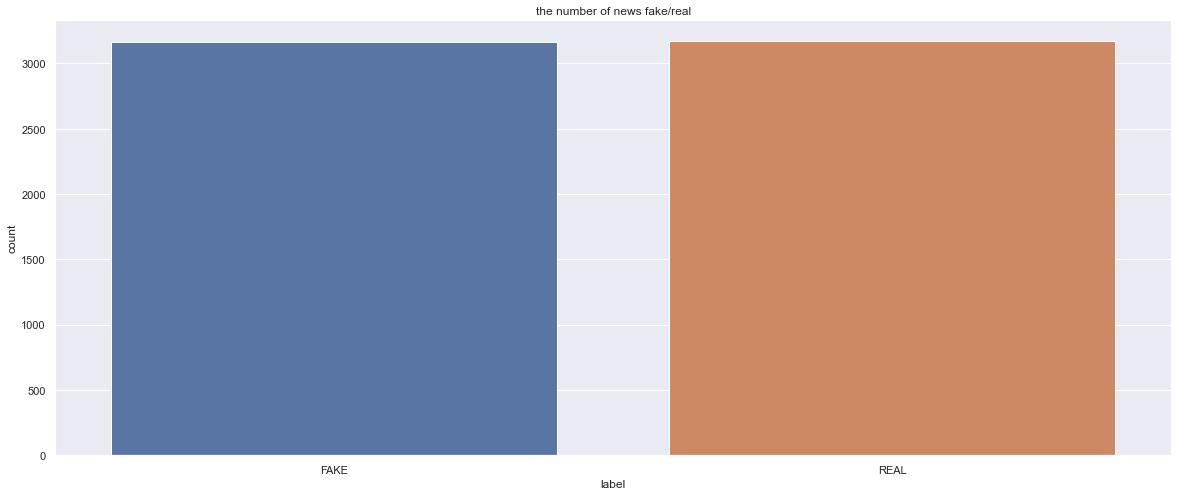

In [6]:
sns.countplot(x='label',data=df)
plt.title('the number of news fake/real');

### Now to Split the dataset into training and testing sets, We will be using 20% for testing data and the reamining for training data

In [7]:
#Split the dataset
X= df['text']
x_train,x_test,y_train,y_test=train_test_split(X, labels, test_size=0.2, random_state=7)

In [8]:
y_test.shape

(1267,)

#### Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features. Now, fit and transform the vectorizer on the train set, and transform the vectorizer on the test set.

In [9]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

#### Next, we’ll be initializing a PassiveAggressiveClassifier,Multinomial Naive Bayes classifier and Support Vector Machines (SVM) Classifier to determine which model works best . We’ll fit this on tfidf_train and y_train.

#### Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics and visualize a confusion matrix to gain insight into the number of false and true negatives and positives.

In [10]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.66%


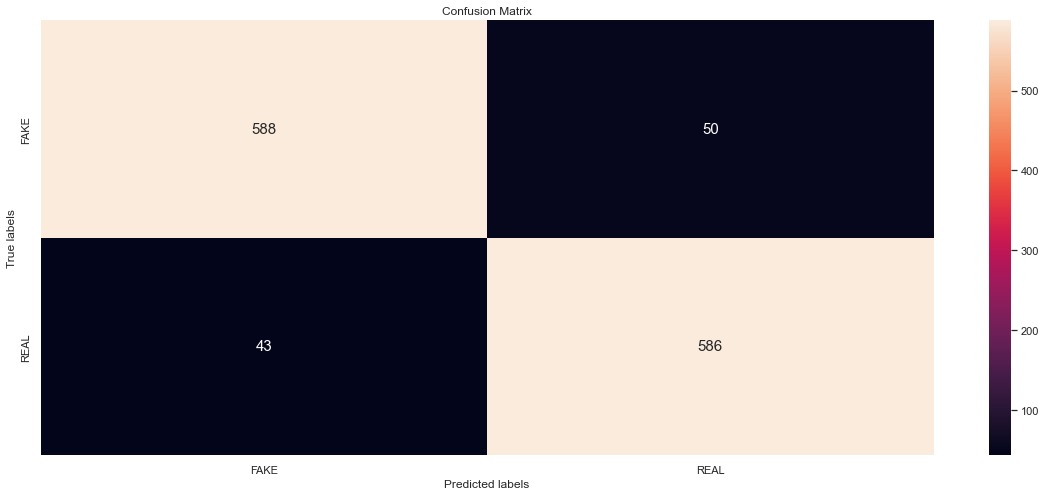

In [11]:
#Build confusion matrix
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['FAKE', 'REAL']); ax.yaxis.set_ticklabels(['FAKE', 'REAL']) 
plt.show() 

In [12]:
# Create and train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

#Predict on the test set and calculate accuracy
y_pred = nb_classifier.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 84.06%


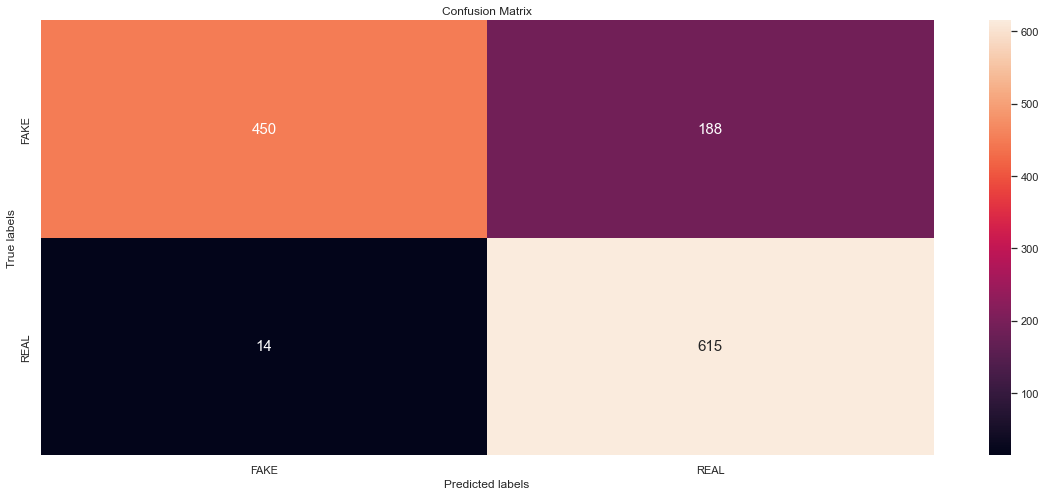

In [13]:
#Build confusion matrix
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['FAKE', 'REAL']); ax.yaxis.set_ticklabels(['FAKE', 'REAL']) 
plt.show() 

In [14]:
# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(tfidf_train, y_train)

# Predict on the test set and calculate accuracy
y_pred = svm_classifier.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.05%


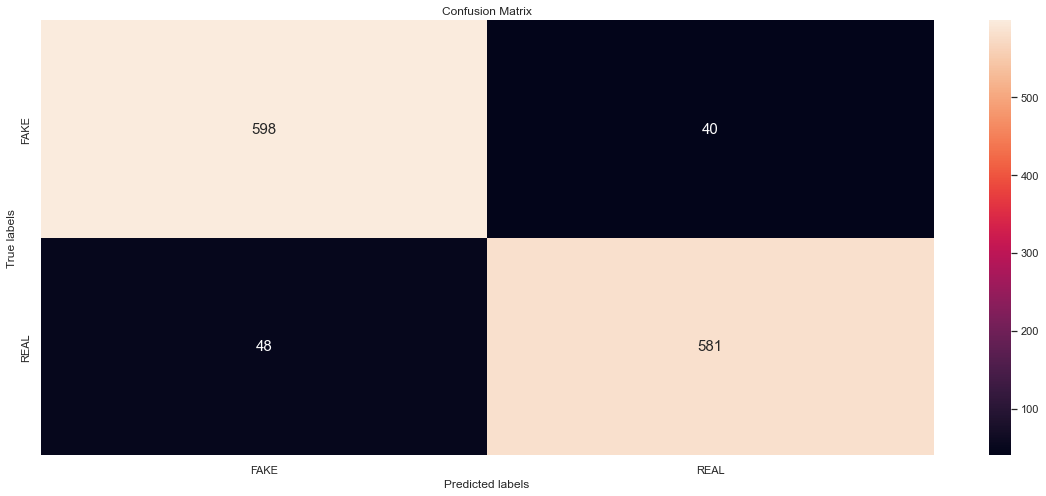

In [15]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax = ax); #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['FAKE', 'REAL']); ax.yaxis.set_ticklabels(['FAKE', 'REAL']) 
plt.show() 

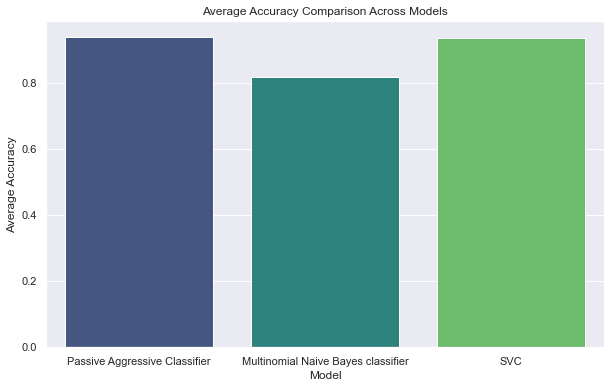

In [16]:
from sklearn.model_selection import cross_val_score
# Define models
models = {
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(max_iter=50),
    'Multinomial Naive Bayes classifier': MultinomialNB(),
    'SVC': SVC(kernel='linear')
}

# Evaluate each model using cross-validation and store results
results = {'Model': [], 'Average Accuracy': []}

for name, model in models.items():
    scores = cross_val_score(model,tfidf_train, y_train, cv=5, scoring='accuracy')
    results['Model'].append(name)
    results['Average Accuracy'].append(scores.mean())

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Average Accuracy', data=results_df, palette='viridis')
plt.title('Average Accuracy Comparison Across Models')
plt.ylabel('Average Accuracy')
plt.show()

### Summary

Today, we learned to detect fake news with Python. We took a political dataset, implemented a TfidfVectorizer, initialized a PassiveAggressiveClassifier,,Multinomial Naive Bayes classifier and Support Vector Machines (SVM) Classifier and fit our model. We ended up obtaining an accuracy of 93.05% in magnitude for using the SVM classification.